In [11]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [13]:
# Import Like This

q1 = pd.read_csv("quarter-1.csv")
q2 = pd.read_csv("quarter-2.csv")
q3 = pd.read_csv("quarter-3.csv")

items = pd.read_csv("items.csv")

### `Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [43]:
# Code Here Answer 1 & 2

df1 = pd.concat([q1, q2, q3], keys=['Q1','Q2','Q3'])
df1

order_id quantity item_id choice_description_id item_price
Q1 0           1        1       1                     1     $3.39 
   1           1        1       2                     2     $3.39 
   2           2        2       4                     3    $16.98 
   3           4        1       7                     6     $9.25 
   4           6        1       9                     8     $8.75 
...          ...      ...     ...                   ...        ...
Q2 2342     1829        1      23                    92    $11.25 
   2343     1830        1      23                  1043    $11.25 
   2344     1832        1      10                   116     $8.75 
   2345     1832        1       8                     0     $4.45 
   2346     1834        1      20                   515    $11.25 

[4622 rows x 5 columns]

In [50]:
# Code Here Answer 3

new_df = df1.reset_index().merge(items, on='item_id')
new_df.rename(columns={"level_0" : "quarter"}, inplace=True)
new_df.groupby(['quarter', 'item_name'])['quantity'].sum().reset_index().sort_values('quantity', ascending=False).drop_duplicates(subset='quarter', keep='first')

,quarter,item_name,quantity
65,Q2,Chicken Bowl,394
17,Q1,Chicken Bowl,367


In [51]:
# Code Here Answer 4

new_df["item_price"] = new_df.item_price.apply(lambda x: float(x[1:]))
new_df["total_item_price"] = new_df['item_price'] * new_df['quantity']
new_df.groupby(['quarter', 'item_name'])['total_item_price'].sum().reset_index().sort_values('total_item_price', ascending=False).drop_duplicates('quarter', keep='first')

,quarter,item_name,total_item_price
65,Q2,Chicken Bowl,4192.25
17,Q1,Chicken Bowl,3852.38


In [53]:
# Code Here Answer 5

new_df.groupby(['quarter', 'order_id'], as_index=False)['total_item_price'].sum().groupby('quarter', as_index=False)['total_item_price'].mean()

,quarter,total_item_price
0,Q1,13.809488
1,Q2,13.279828


### `Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [7]:
balls = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")
matches = pd.read_csv("IPL_Matches_2008_2022.csv")

In [61]:
# Code Here

seasondf = balls.merge(matches[['ID', 'Season']], on='ID')

seasondf['isBowlerWicket'] = seasondf.kind.apply(lambda x: 1 if x in ['caught', 'caught and bowled', 'bowled', 'stumped', 'lbw', 'hit wicket'] else 0)

seasondf['bowlerRun'] = seasondf.extra_type.apply(lambda x: 0 if x in ['legbyes', 'byes'] else 1) * seasondf['total_run']

seasondf['isLegalBall'] = seasondf.extra_type.apply(lambda x: 0 if x in ['wide', 'noballs'] else 1)

pcapdf = seasondf.groupby(['Season', 'bowler'], as_index=False)[['isBowlerWicket', 'bowlerRun', 'isLegalBall']].sum()
pcapdf['Economy'] = pcapdf['bowlerRun'] / pcapdf['isLegalBall'] * 6

pcapdf.sort_values(['isBowlerWicket', 'Economy'], ascending=[False, True]).drop_duplicates('Season', keep='first').sort_values('Season')


,Season,bowler,isBowlerWicket,bowlerRun,isLegalBall,Economy
84,2007/08,Sohail Tanvir,22,266,264,6.045455
174,2009,RP Singh,23,417,375,6.672000
284,2009/10,PP Ojha,21,429,359,7.169916
447,2011,SL Malinga,28,375,394,5.710660
537,2012,M Morkel,25,453,388,7.005155
629,2013,DJ Bravo,32,497,391,7.626598
779,2014,MM Sharma,23,452,324,8.370370
847,2015,DJ Bravo,26,426,323,7.913313
938,2016,B Kumar,23,490,413,7.118644
1048,2017,B Kumar,26,369,323,6.854489


### `Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [63]:
# Code Here

death_over = seasondf[seasondf.overs>=15]


pcapdf = death_over.groupby('bowler', as_index=False)[['isBowlerWicket', 'bowlerRun', 'isLegalBall']].sum()
pcapdf['Economy'] = pcapdf['bowlerRun'] / pcapdf['isLegalBall'] * 6

pcapdf.sort_values(['isBowlerWicket', 'Economy'], ascending=[False, True]).head()


,bowler,isBowlerWicket,bowlerRun,isLegalBall,Economy
91,DJ Bravo,115,2161,1457,8.899108
331,SL Malinga,108,1464,1166,7.533448
53,B Kumar,90,1752,1222,8.602291
148,JJ Bumrah,80,1614,1178,8.220713
339,SP Narine,67,1164,967,7.222337


### `Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [70]:
# Code Here

batterdf = seasondf.copy()

batterdf['IsBatsmanBall'] = batterdf['extra_type'].apply(lambda x: 1 if x != 'wides' else 0)

def bat_record_season(batsman):
    bdf = batterdf[batterdf.batter == batsman].copy()
    bdf['IsBatsmanOut'] = bdf.batter == bdf.player_out
    
    df = bdf.groupby(['Season', 'ID'], as_index = False)[['batsman_run', 'IsBatsmanBall', 'IsBatsmanOut']].sum()
    innings = df.groupby('Season').ID.count()
    
    df = df.groupby('Season').agg({
        
        'batsman_run' : ['sum','max'],
        'IsBatsmanBall' : 'sum',
        'IsBatsmanOut' : 'sum'
    })
    
    
    df["Innings"] = innings
    df["TotalRuns"] = df[("batsman_run", "sum")]
    df["Avg"] = df["TotalRuns"] / df[('IsBatsmanOut', 'sum')]
    df["HighestScore"] = df[('batsman_run', 'max')]
    df["StrikeRate"] = df["TotalRuns"] /df[('IsBatsmanBall', 'sum')] * 100
    
    return df.drop(columns = ["batsman_run", "IsBatsmanBall", "IsBatsmanOut"])

bat_record_season('V Kohli')

,Innings,TotalRuns,Avg,HighestScore,StrikeRate
,,,,,
Season,,,,,
2007/08,12,165,15.000000,38,105.095541
2009,13,246,22.363636,50,112.328767
2009/10,13,307,27.909091,58,144.811321
2011,16,557,46.416667,71,121.086957
2012,15,364,30.333333,73,111.656442
2013,16,639,45.642857,99,139.215686
2014,14,359,27.615385,73,122.108844
2015,16,505,45.909091,82,130.829016


### `Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [78]:
# Code Here

df = balls.merge(matches[['ID', 'Player_of_Match']], on='ID')

batterdf = df[df.batter == df.Player_of_Match].copy()
batterdf['IsBatsmanBall'] = batterdf['extra_type'].apply(lambda x: 1 if x != 'wides' else 0)
batter = batterdf.groupby(["ID", "batter"], as_index=False)[['batsman_run', 'IsBatsmanBall']].sum()

batter['BattingFigure'] = batter[['batsman_run', 'IsBatsmanBall']].apply(lambda x: '/'.join(map(str, x.values)), axis=1)
batter.rename(columns={'batter': 'PlayerOfMatch'}, inplace=True)

batter.head()

,ID,PlayerOfMatch,batsman_run,IsBatsmanBall,BattingFigure
0,335982,BB McCullum,158,73,158/73
1,335983,MEK Hussey,116,54,116/54
2,335985,MV Boucher,39,19,39/19
3,335986,DJ Hussey,38,43,38/43
4,335987,SR Watson,76,49,76/49


In [79]:
bowlerdf = df[df.bowler == df.Player_of_Match].copy()
bowlerdf['IsBowlerWicket'] = bowlerdf['kind'].apply(lambda x: 1 if x in ['caught', 'caught and bowled', 'bowled', 'stumped', 'lbw', 'hit wicket'] else 0)
bowlerdf['bowlerRun'] = bowlerdf.extra_type.apply(lambda x: 0 if x in ['legbyes', 'byes'] else 1) * bowlerdf['total_run']

bowler = bowlerdf.groupby(["ID", "bowler"], as_index=False)[['bowlerRun', 'IsBowlerWicket']].sum()

bowler['BowlingFigure'] = bowler[['bowlerRun', 'IsBowlerWicket']].apply(lambda x: '/'.join(map(str, x.values)), axis=1)
bowler.rename(columns={'bowler': 'PlayerOfMatch'}, inplace=True)

bowler.head()

,ID,PlayerOfMatch,bowlerRun,IsBowlerWicket,BowlingFigure
0,335984,MF Maharoof,11,2,11/2
1,335986,DJ Hussey,35,1,35/1
2,335987,SR Watson,39,0,39/0
3,335990,YK Pathan,20,2,20/2
4,335992,SR Watson,20,2,20/2


In [84]:
batter.merge(bowler, on=['ID', 'PlayerOfMatch'], how="outer").drop(columns=["batsman_run", "IsBatsmanBall", "IsBowlerWicket", "bowlerRun"]).head()

,ID,PlayerOfMatch,BattingFigure,BowlingFigure
0,335982,BB McCullum,158/73,NaN
1,335983,MEK Hussey,116/54,NaN
2,335984,MF Maharoof,NaN,11/2
3,335985,MV Boucher,39/19,NaN
4,335986,DJ Hussey,38/43,35/1


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [85]:
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")

petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")

versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")

setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")

### `Q-10:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

<Axes: xlabel='kind'>

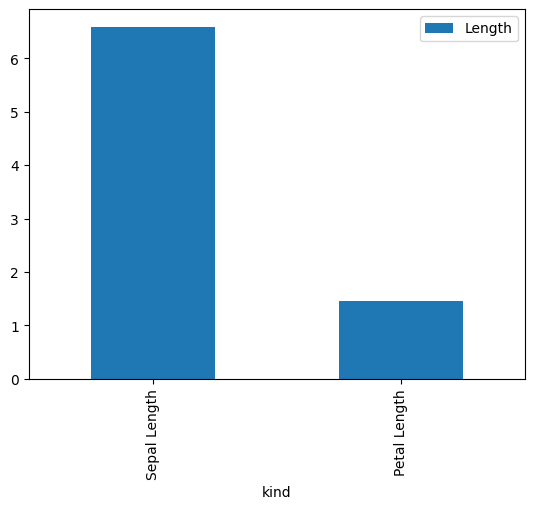

In [90]:
# Code Here

sepal = pd.merge(virginica, sepal_all, on='Id')["SepalLengthCm"].mean()
petal = pd.merge(setosa, petal_all, on='Id')["PetalLengthCm"].mean()

pd.DataFrame({
    "kind" : ['Sepal Length', 'Petal Length'], 
    "Length" : [sepal, petal]
}).plot(x='kind', kind='bar')

### `Q-11:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [98]:
# Code Here

v_sepal = pd.merge(virginica, sepal_all, on='Id').drop(columns=["Unnamed: 0_x", "Unnamed: 0_y"])
v = pd.merge(v_sepal, petal_all, on='Id').drop(columns="Unnamed: 0")


s_sepal = pd.merge(setosa, sepal_all, on='Id').drop(columns=["Unnamed: 0_x", "Unnamed: 0_y"])
s = pd.merge(s_sepal, petal_all, on='Id').drop(columns="Unnamed: 0")


ve_sepal = pd.merge(versicolor, sepal_all, on='Id').drop(columns=["Unnamed: 0_x", "Unnamed: 0_y"])
ve = pd.merge(ve_sepal, petal_all, on='Id').drop(columns="Unnamed: 0")


pd.concat([v,s,ve]).sample(150)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,90,Iris-versicolor,5.5,2.5,4.0,1.3
2,53,Iris-versicolor,6.9,3.1,4.9,1.5
44,45,Iris-setosa,5.1,3.8,1.9,0.4
42,93,Iris-versicolor,5.8,2.6,4.0,1.2
39,140,Iris-virginica,6.9,3.1,5.4,2.1
...,...,...,...,...,...,...
19,70,Iris-versicolor,5.6,2.5,3.9,1.1
49,150,Iris-virginica,5.9,3.0,5.1,1.8
4,105,Iris-virginica,6.5,3.0,5.8,2.2
47,148,Iris-virginica,6.5,3.0,5.2,2.0


### `Q-12:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [ ]:
# Code Here


print(f"Minimum Sepal width of Setosa is {s.SepalWidthCm.min()}")
print(f"Maximum Sepal width of Setosa is {s.SepalWidthCm.max()}")

print(f"Minimum Petal width of Setosa is {s.PetalWidthCm.min()}")
print(f"Maximum Petal width of Setosa is {s.PetalWidthCm.max()}")

print("**************************************************")

print(f"Minimum Sepal width of Versicolor is {ve.SepalWidthCm.min()}")
print(f"Maximum Sepal width of Versicolor is {ve.SepalWidthCm.max()}")

print(f"Minimum Petal width of Versicolor is {ve.PetalWidthCm.min()}")
print(f"Maximum Petal width of Versicolor is {ve.PetalWidthCm.max()}")

print("**************************************************")

Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4
Minimum Petal width of Setosa is 0.1
Maximum Petal width of Setosa is 0.6
**************************************************
Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4
Minimum Petal width of Versicolor is 1.0
Maximum Petal width of Versicolor is 1.8
**************************************************
